In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as ticker


Instructions:
Plot the following information for your simulation based on your read.mappinginfo:
• fragment length distribution
• mutation distribution
• barplot with the number of reads in the following categories:
– all reads
– number of non-split reads (fw and rw) (non-split := the corresponding genomic
vector consists only of a single region)
– number of non-split reads with no mismatches
– number of split reads
– number of split reads with no mismatches
– number of split reads with no mismatches where all regions are at least 5 basepairs
long
readid	chr	gene	transcript	fw_regvec	rw_regvec	t_fw_regvec	t_rw_regvec	fw_mut	rw_mut



# Load Data

In [80]:
mapping_info_path = 'C:\\Users\\Simon\\IdeaProjects\\gobi\\data\\readsimulator\\analysisoutput\\read.mappinginfo'

In [81]:
mapping_info_df = pd.read_csv(mapping_info_path, sep='\t')

C:\Users\Simon\AppData\Local\Temp\ipykernel_14496\127145500.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mapping_info_df = pd.read_csv(mapping_info_path, sep='\t')


In [82]:
## Fragment Length Distribution
# We can get the fragment length distribution by subtracting the start position of the read from the end position of the read. That means subtract first number from start-end in t_fw_regvec from the second number from start-end in t_rw_regvec. +1 to include the last basepair.

fragment_lengths = [
    int(rw.split('-')[1]) - int(fw.split('-')[0]) + 1
    for rw, fw in zip(mapping_info_df['t_rw_regvec'], mapping_info_df['t_fw_regvec'])
]
# Make a histogram of the fragment lengths, show the SD and mean, and a line
mean_length = np.mean(fragment_lengths)
std_length = np.std(fragment_lengths)

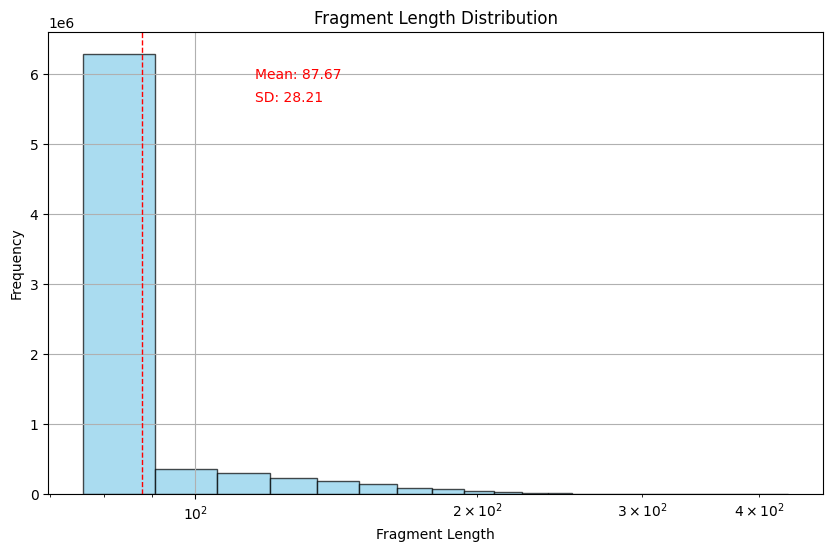

In [83]:


# Create the histogram
plt.figure(figsize=(10, 6))
# Shimazaki and Shinomoto Method For Optimal Histogram Bins


plt.hist(fragment_lengths, bins='auto', color='skyblue', edgecolor='black', alpha=0.7)
plt.xscale('log')
# Add a vertical line for the mean
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1)

# Add text for mean and standard deviation
plt.text(mean_length + std_length, plt.ylim()[1] * 0.9, f'Mean: {mean_length:.2f}', color='red')
plt.text(mean_length + std_length, plt.ylim()[1] * 0.85, f'SD: {std_length:.2f}', color='red')

# Add labels and title
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.title('Fragment Length Distribution')

# Show the plot
plt.grid(True)
plt.show()

In [84]:
# Count the number of mutations in each row for fw_mut and rw_mut
fw_mutation_counts = [len(fw.split(',')) if isinstance(fw, str) and fw else 0 for fw in mapping_info_df['fw_mut']]
rw_mutation_counts = [len(rw.split(',')) if isinstance(rw, str) and rw else 0 for rw in mapping_info_df['rw_mut']]

In [ ]:
plt.hist(fw_mutation_counts, bins='auto', alpha=0.5, label='FW Reads', color='blue')
plt.hist(rw_mutation_counts, bins='auto', alpha=0.5, label='RW Reads', color='red')
plt.xlabel('Number of Mutations')
plt.ylabel('Frequency')
plt.title('Histogram of Mutation Counts')
plt.legend()
plt.show()

In [ ]:
# Function to check if all regions have a length >= 5
def check_region_length(regvec):
    # Split the regvec by '|'
    regions = regvec.split('|')

    # Check each region
    for region in regions:
        start, end = region.split('-')
        start = int(start)
        end = int(end)

        # Check if the length of the region is at least 5
        if end - start < 5:
            return False

    return True

In [72]:
# Barplot
# – all reads
# – number of non-split reads (fw and rw) (non-split := the corresponding genomic
# vector consists only of a single region), we can check if there is a | in the string
# – number of non-split reads with no mismatches
# – number of split reads
# – number of split reads with no mismatches
# – number of split reads with no mismatches where all regions are at least 5 basepairs
# long


all_reads = len(mapping_info_df)

# Number of non-split reads (fw and rw)
non_split_read_fw = len([fw for fw in mapping_info_df['fw_regvec'] if '|' not in fw])
non_split_read_rw = len([rw for rw in mapping_info_df['rw_regvec'] if '|' not in rw])

# Number of non-split reads with no mismatches
non_split_read_fw_no_mismatches = len(
    mapping_info_df[~mapping_info_df['fw_regvec'].str.contains(r'\|', na=False)& pd.isna(mapping_info_df['fw_mut'])]
)

non_split_read_rw_no_mismatches = len(
    mapping_info_df[~mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['rw_mut'])]
)

# Number of split reads
split_read_fw = len([fw for fw in mapping_info_df['fw_regvec'] if '|' in fw])
split_read_rw = len([rw for rw in mapping_info_df['rw_regvec'] if '|' in rw])

# Number of split reads with no mismatches
split_read_fw_no_mismatches = len(
    mapping_info_df[mapping_info_df['fw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['fw_mut'])]
)
split_read_rw_no_mismatches = len(
    mapping_info_df[mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) & pd.isna(mapping_info_df['rw_mut'])]
)

# Number of split reads with no mismatches where all regions are at least 5 basepairs long
split_read_fw_valid_length = len(
    mapping_info_df[
        mapping_info_df['fw_regvec'].str.contains(r'\|', na=False) &
        mapping_info_df['fw_regvec'].apply(check_region_length) &
        pd.isna(mapping_info_df['fw_mut'])
        ]
)

split_read_rw_valid_length = len(
    mapping_info_df[
        mapping_info_df['rw_regvec'].str.contains(r'\|', na=False) &
        mapping_info_df['rw_regvec'].apply(check_region_length) &
        pd.isna(mapping_info_df['rw_mut'])
        ]
)


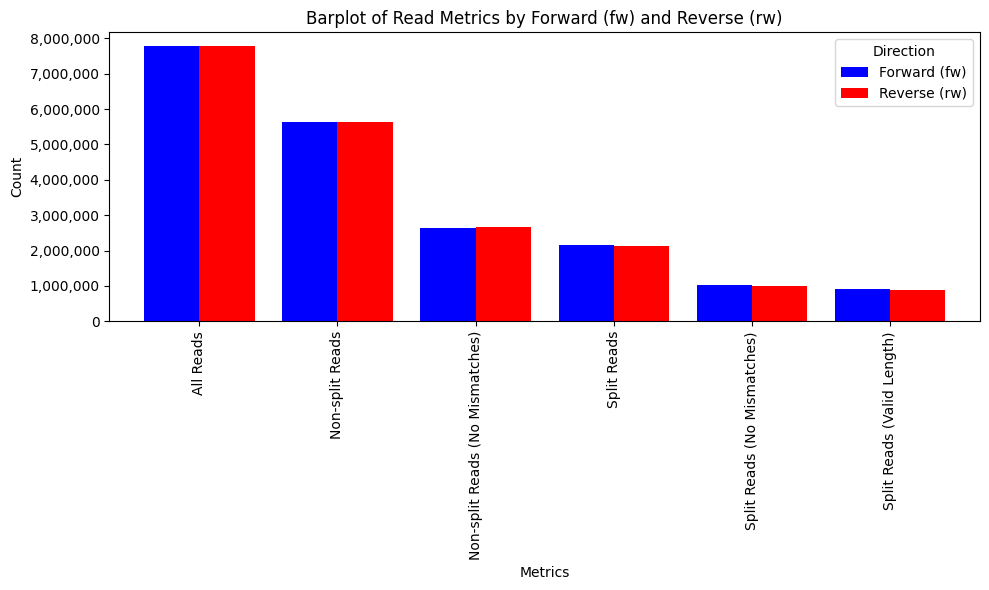

In [78]:

metrics = [
    ('All Reads', all_reads, all_reads),  # For 'All Reads', both fw and rw should be equal
    ('Non-split Reads', non_split_read_fw, non_split_read_rw),
    ('Non-split Reads (No Mismatches)', non_split_read_fw_no_mismatches, non_split_read_rw_no_mismatches),
    ('Split Reads', split_read_fw, split_read_rw),
    ('Split Reads (No Mismatches)', split_read_fw_no_mismatches, split_read_rw_no_mismatches),
    ('Split Reads (Valid Length)', split_read_fw_valid_length, split_read_rw_valid_length)
]

df = pd.DataFrame(metrics, columns=['Metric', 'fw', 'rw'])

fig, ax = plt.subplots(figsize=(10, 6))

df.set_index('Metric').plot(kind='bar', ax=ax, color=['blue', 'red'], width=0.8)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_xlabel('Metrics')
ax.set_ylabel('Count')
ax.set_title('Barplot of Read Metrics by Forward (fw) and Reverse (rw)')
ax.legend(title='Direction', labels=['Forward (fw)', 'Reverse (rw)'], loc='upper right')

plt.tight_layout()

plt.show()
